<p align="center">
  <img src="img/GMITLOGO.jpg" width="500"/></p>

# GMIT, H.Dip in Data Analytics, Programming for Data Analysis Project 2018

## 1. Introduction

This repository contains all of the files pertaining to my 2018 project submission for the Programming for Data Analysis module of the GMIT H.Dip program in Data Analytics. All of the work contained within this repository was carried out over the course of a 4 week period in November and December 2018. This Jupyter notebook [1] contains the complete documentation for the project.

### 1.1 Project objective

The objective of this project is to sythesise a data set based on some real world phenomenon. This requires investigation in to the pheonmenon and then using  the `numpy.random` package in Python [2] to simulated some data based on this. The problem statement for the assignment is as follows [3]:

1. Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.
1. Investigate the types of variables involved, their likely distributions, and their relationships with each other.
1. Synthesise/simulate a data set as closely matching their properties as possible.
1. Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.

### 1.2 Choice of real world phenomenon

I am currently working in operations at a malt production facility in Ireland. Malting is a process whereby raw cereal grains (barley mainly) are re-hydrated to siumlated planting in soil, and then let germinate for a number of days. During this germination process the cellular structure of the grain is modified, releasing sugars. The grain is then kilned to stop the germination process while drying the grain, fixing the properties of the grain, and improving the colour and flavour characterisitcs of the final product. 

Worldwide, the largest consumers of malted barley are the brewing and distilling industries [4], using 96% of all malt produced. The most important property of any brewing or distilling malt is its *extract potential* which determines how much sugar is available for conversion to alcohol in the brewing (beer production)/distilling (whiskey production) process [5]. Distillers are particularly interested in *spirit yield* to determine how much many litres of alcohol they are likely to get from each tonne of malt purchased.

The maltster's role in this process is to take a natural raw material and create a consistent product, which maximises the extract potential and spirit yield for their customers. There are many factors in the process which can influence the final extract potential and spirit yield. For this project we are only going to consider the relationship between the protein levels in the raw barley and the final extacts and predicted spirit yields (PSY).

<p align="center">
  <img src="img/maltingbarley.jpg" width="500"/></p>
   <p style="text-align: center;"> <b><I><a href="https://www.bratney.com/industries/malting--brewing">Malted Barley</a></I></b> </p>  


### 1.3 Plan for the project

The plan for this project is as follows:
1. Section 2 will give an a brief introduction to the malting process, and define the important variables for this project
1. In Section 3 I will analyse an existing dataset to summarise the distributions of the various variables and the relationships between
1. In Section 4 I will systhesise a dataset using the relationship and distributions defined in Section 3
1. Section 5 will cover some rudimentary analysis of the sythesised dataset
1. The project will be concluded in Section 6

## 2. Overview of the Malting Process
### 2.1 Introduction to Malting

In this section I will outline a brief overview of the malting process. This should give a broad understanding of where the data set comes from, how the variables in it are expected to relate to one another, and how these relationships may be influenced by other factors. 

A process flow diagram for the process is shown below: 

<p align="center">
  <img src="img/process.png" width="850"/></p>
  <p style="text-align: center;"> <b><I>Malting Process Flow Diagram</I></b> </p> 


### 2.2 Barley Growing and Harvesting
The first and perhaps most important stage in the process is the barely growing and harvesting stage. The agronomic program given to a field of barley during its growing season can help determine the level of nitrogen and hence protein in the grain. In Ireland, Spring malting barley is typically sown in March and harvested in August [7]. During this growing season, the grower is responsible for ensuring that the agonomic program used optimises the nitrogen content in the grain while balancing this with a good yield per acre sown. In Ireland,  there is a requirement for approximately 70% brewing barley and 30% distilling barely for any given harvest year. The maximum protein level allowed for distilling barely is 9.3% [8]. Barley for brewing can be accepted up to 10.8% [6]. During the growing season the farmer will apply a nitrogen based fertiliser to improve the growth in the barley. This will improve the yield per acre for the farmer. However, if too much fertiliser is applied (or it applied too late in the season) the nitrogen levels in the harvested barley will be higher [9], [10] . This barely will be unsuitable for making distilling malt, and may even be rejected for brewing if the protein levels are too high.

<p align="center">
  <img src="img/spraying.jpg" width="650"/></p>
   <p style="text-align: center;"> <b><I><a href="https://www.agriland.ie/farming-news/new-fertiliser-rules-winter-barley/">Barley Spraying</a></I></b> </p>  
   
Another aspect that impacts protein levels in the grain is the weather during the growing season. When the plants are growing the nitrogen levels in the corn is higher earlier in the growing season. The nitrogen comes from the soil and the fertiliser applied. Later in the season as the barley ripens, ready for harvesting, more starch arrives in the grains as they increase in size. If the barley growing season is too dry, the barley will ripen early before there is time for the grains to fill out with starch. This will result in higher protein barley.  

Another consideration at this stage is the variety of barley sown. There are many different barely varities and new ones are developed every year to try and:
* Improve yield for growers
* Improve disease resistance during the growing season
* Improve extracts for the brewers
* Improve yields for the malster
* Improve spirit yields for the distillers

### 2.3 Barley Intake, Drying and Storage
Once the grower believes that the barley is ready to be harvested, a sample is taken and tested for moisture and protein. Once the moisture and protein are in specification as agreed with the maltster, the farmer will proceed to cut the barley. When the barley arrives at the intake, it is tested for moisture and protein. The maltster will then segregate the barley based on the variety and protein content. Some stores will be allocated to ditilling barely (lowest protein), while others will be allocated to brewing. Most years there are 4 to 5 different barley varieties sown, as they each have different properties. This allows the maltster to blend the correct mix of them together to ensure the malt is right for brewing and distilling. 

<p align="center">
  <img src="img/sampling.jpg" width="550"/></p>
   <p style="text-align: center;"> <b><I><a href="http://www.ukmalt.com/barley-requirements">Barley Sampling at Intake</a></I></b> </p> 

The moisture level in the freshly cut barley is usually in the range of 15-21%. Barley at this moisture level is unsafe for long term storage as the grain will start to respire in storage and generate heat. This heat is conducive to microbial growth [11]. Grain at this moisture is also susecptible to mite infestation. Therefore the barely must be dried to below 13% moisture for safe storage. All barley storage areas have aeration systems that are used to cool the barley to below 13<sup>o</sup>C. This is done to prevent hot spots forming in the grain bulk. Note that barley may often be have to stored safely for up to 18 months before some of it used.

### 2.4 Steeping
Once the barley is required for malting, the maltster will take a batch of malt from a store (using either higher or lower protein barley depending on whether a brewing or distilling malt is required). The first process step in the maltings is steeping. Steeping is the controlled rehydration of the barley. For the maltster, the desired output from this process is to have the barley moisture in the region of 44-46%. Also, the grain should have begun to respire and generate heat. The temperature in the grain should have risen to approximately 18<sup>o</sup>C [12]. 

<p align="center">
  <img src="img/imagesteep.jpg" width="450"/></p>
   <p style="text-align: center;"> <b><I><a href="http://merryn.dineley.com/2016/09/a-morning-with-maltsters-part-three-on.html">Steeping Vessel</a></I></b> </p> 
   
Higher protein barley is harder than lower protein barley. The effect of this is that it makes it more difficult for higher protein barley to take on water during the steeping phase [13]. Therefore, the maltster must select a steeping regime to adequately rehydrate the barely. Some of the controls available are:
1. Selecting the appropriate 'wet' and 'dry' times. Rather that keeping the barely under water for many hours, the stepping process is usualy broken into 2 or 3 wet periods with dry air breaks between then to allow respiriation to start and heat to build. The water is drained from the grain at the end of the wet periods. A typical 2-wet steeping program is 7 hours wet with 15 hour air break, then 12 hours wet and a 4 hour air break.
1. Deciding on the water temperature to be used. Unheated steep water is usually about 8-10<sup>o</sup>C. This can be heated to 13-16<sup>o</sup>C to improve water uptake.
1. CO<sub>2</sub> extraction speed. During the air break the grain respires and starts to generate CO<sub>2</sub>. Fans are used to remove this. During the first air break, the speed of the fans can be slowed to allow some heat generate in the grain. This heat will improve water uptake in the second wet - but it must be balanced with the need to remove CO<sub>2</sub> and oxygenate the grain during the dry phase.
    
### 2.5 Germination

The purpose of steeping is to initiate grain growth through hydration. Once the grain is sufficiently hydrated, the germination process can begin [14]. The hydration of the grain starts a process whereby enzymes are released in the grain. These enzymes change the cellular structure of the grain. This is happeding naturally as the barley grain is a seed that wants to grow into a plant. The cellular structure is changing to allow some of the starch in the grain to be used as energy to start this growth. The maltster is looking for this process to commence so that:
1. Hard $\beta$ - glucan material in the cell wall breaks down (this makes malt easier to mill and brew)
1. Protein begins to solubilise - this provides yeast nutrition in the fermentation process
1. The sugars are released in the grain - required for fermentation into alcohol

However, the process, must be carefully controlled so that, all grains in a batch are modified evenly and that the grain does not become over modified - this happens when a batch goes too far. The consequences of over modification are loss of extract and PSY as the grain uses energy trying to grow into a plant, and loss of malting yield as much of the weight of the grain is lost through rootlet growth.

A schematic of the germination process is shown below:

<p align="center">
  <img src="img/germination.JPG" width="700"/></p>
<p style="text-align: center;">
   <b><I>Germination Vessel Schematic</I></b></p>
   
The process is as follows:
1. Humidified air is blown through a perforated floor to aerate the grain bed
1. Heat generated by the grain is recirculated to pre heat this humidified air
1. The temperature of the grain is controlled by measuring the temperature below and above the grain and settig the fan speed and reciculation flap position as required
1. The grain is turned regularly to improved airflow and prevent the rootletsfrom the grain from matting together

The correct control of this process will have a direct impact on the PSY and extracts in the final malt


### 2.6 Kilning

The final step in the malting plant is kilning. The purpose of kilning is reduce the moisture to a level that allows the malt to be safely stored by halting the grain modification from the germination phase. The malt is dried from approximately 42% moisure to 4% moisture in the kiln [15]. This drying is carried out by blowing heated air through the grain bed. There are 3 main stages to the kilning process:
1. Free drying, where high air flows and low temperatures are used to remove the surface moisture from the grain, bringing the moisture to approximately 15%
1. Forceed drying where low air flows and high temperatures remove the bound moisture from the inside of the grain - bringing the moisture to about 5%
1. Curing - this is the last stage where the flavour and colour profiles are fixed by removing the last 1% moisture

<p align="center">
  <img src="img/kilning.jpg" width="450"/></p>
   <p style="text-align: center;"> <b><I><a href="http://www.bairds-malt.co.uk/Bairds-Malt/Process/process">Inside a Modern Malt Kiln</a></I></b> </p> 

The kilning process does not have a major impact on either extract or PSY - these properties are fixed in the germination phase. However, the enzymes released during germination are also of interest to the brewers and distillers and the kilning program selected has a huge impact on these. Generally distillers want to preserve as much of the enzyme as possible, so distilling malt is made with lower temperatre and gentler kilning programs with moisture allowed up to 5% in some cases. Brewers are not as concerened with these enzymes and commecially would prefer lower moistures (as they don't want to pay for excess water in the grain!) so more robust kiln programs with higher temperatures are used for producting brewers malt.


### 2.7 Analysis

Once a malt batch is finished on the kiln, it is thoughly sampled. These samples are sent for a full suite of analysis to determine the quality of the malt and its suitability for its intended customer. The 2 malt analystes which we are concered with for this project are:
1. Extract
1. Predicted Spirit Yield

Extract is measured by milling some malt and mixing it with hot water, the sugars in the malt dissolve in the water. The sugar solution (known as wort), is seperated from the insoluble material in the grain. The specific gravity of the wort is measure and this gived an indication of the extractable sugars available in the malt[16].

Predicted spirit yield is measured by producing a wort and then fermenting some of it with yeast to measure the fermentable extract. Once the laboratory technician knows the extract and the fermentable extract, the PSY can be calulated with a formula.

### 2.8 The data set

In section 3, I will analyse an existing data set to determine what the relationships are between the barley protein and the extract and PSY. In section 2 I have given a brief outline of the malting process, with a focus on how each step in the process affects these 3 variables. It is important to understand that while a correlation between protein and extract and PSY is expected there are many factors in the process that contribute to the final results.

## 3. Data Set
### 3.1 Introduction to the dataset

In order to simulate a dataset that compares the extracts and predicted spirit yields from malted barley to the protein levels in the grain, we must first analyse an existing dataset to try to understand the relationships between the variables. For this purpose I have collected a dataset that contains this information. Each record in the data set corresponds to a different production batch, made in the same manufacuring unit with barley that was grown and harvested in the same growing season. The dataset is included in this repository as `protein.csv`.
The dataset will need to be analysed to help first understand:
* The ratio of brewing batches to distilling batches (malt type)
* The proportion of batches made from each barley variety for each malt type
* The typical protein levels in the barley and the distribution of it - this is expected to vary per malt type and barley variety
* The relationship between the extract and the protein for brewing batches
* The relationship between the spirit yield and the protein for the distilling barley

The next step is to import the dataset and commence the analysis.

### 3.2 Analysis of the dataset

In this section the dataset will be analysed.
#### Libraries

In [74]:
# import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

#### Data

In [75]:
# import the data set to a pandas dataframe
df = pd.read_csv("data/protein.csv")
# take a look at a random sample of data from the datasetb
df.sample(10)

,type,variety,extract,psy,protein
81,Distilling,Planet,NaN,419.0,10.4
209,Brewing,Olympus,83.0,NaN,9.7
114,Brewing,Planet,83.6,NaN,9.6
124,Brewing,Planet,81.5,NaN,10.4
195,Brewing,Laureate,82.0,NaN,10.1
294,Brewing,Planet,81.8,NaN,10.4
154,Brewing,Laureate,83.0,NaN,10.0
302,Brewing,Planet,82.9,NaN,10.1
290,Brewing,Planet,82.4,NaN,10.0
55,Brewing,Propino,82.3,NaN,10.2


#### Data breakdown per malt type

A quick look at the data shows that the dataset has 5 columns - the malt type (either brewing or distilling), the barley variety (e.g. Planet, Olympus, Propino etc.), the extract (just for brewing batches), the PSY (just for distilling batches) and the protein. The next step is to use some pie charts to determine the split between brewing and distilling batches, but also how each of these break down per variety.

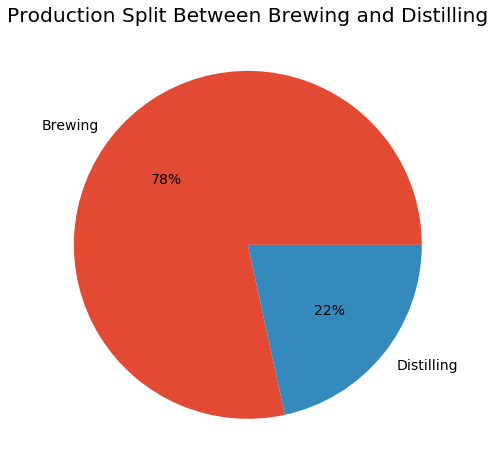

In [76]:
# Tidy up the plots - use more modern formatting (https://matplotlib.org/users/style_sheets.html)
plt.style.use('ggplot')
# Set the font size - https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot
plt.rcParams.update({'font.size': 14})
# Resize the plotting window to make it easier to read (https://stackoverflow.com/questions/36367986/how-to-make-inline-plots-in-jupyter-notebook-larger)
plt.rcParams['figure.figsize'] = [8, 8]

# group the dataset by 'type' and count them
count = df.groupby('type').count()['variety']
# plot the pie chart
plt.pie(count,labels=count.index, autopct='%1.0f%%')
plt.title("Production Split Between Brewing and Distilling")

plt.show()

#### Data breakdown per variety

For each malt type, we will also need to know the breakdown per variety

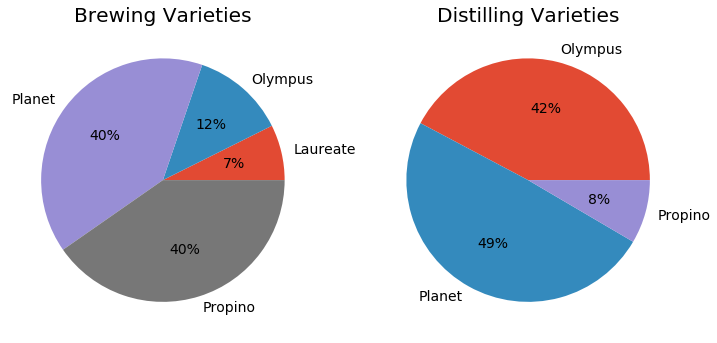

In [73]:
# create 2 new data frames based on the malt type
brewing = df.loc[df.loc[:, "type"] == 'Brewing']
distilling = df.loc[df.loc[:, "type"] == 'Distilling']
# resize the plots
plt.rcParams['figure.figsize'] = [12, 12]

# group the datasets by 'variety' and count them
brew_count = brewing.groupby('variety').count()['protein']
dist_count = distilling.groupby('variety').count()['protein']

# plot the pie charts with sub plots
plt.subplot(1, 2, 1, title='Brewing Varieties')
plt.pie(brew_count,labels=brew_count.index, autopct='%1.0f%%')
plt.subplot(1, 2, 2, title ='Distilling Varieties')
plt.pie(dist_count,labels=dist_count.index, autopct='%1.0f%%')
plt.show()


### Analyse real data to understand the relationship between Protein and PSY/ Extract per Barley Variety
### Record the relationships

## 4. Data Simulation
### Generate 200 Data points
### Split between brewing/distlling to remain as the original data set
### Barley variety per malt type to be the same
### Brewing / Distilling TPd to be distributed as per our original set
### Relationships between TPd and PSY and EX to be simulated based on Step 3

## 5. Discussion

## 6. Conclusion

## References

1. [1] Project Jupyter. Project Jupyter Home. (_https://www.jupyter.org/_)
1. [2] Numpy Deveolpment Team. Numpy Random Sampling (`numpy.random`). (_https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.random.html_)
1. [3] Dr. Ian McLoughlin. GMIT. Project 2018: Programming for Data Analysis. (*https://github.com/ianmcloughlin/progda-project-2018/raw/master/project.pdf*)
1. [4] Ivor Murrell. Malt, Unravelling the Mystery. (*http://www.ukmalt.com/malt-unravelling-mystery*)
1. [5] The Institute of Brewing and Distilling. General Certificate in Malting (pp. 68-69).  (*http://www.ibdlearningzone.org.uk/article/show/pdf/1126/*) 
1. [6] The Maltsters' Association of Great Britain. Barley Requirements.  (*http://www.ukmalt.com/barley-requirements*)
1. [7] The Institute of Brewing and Distilling. General Certificate in Malting (pp 16).  (*http://www.ibdlearningzone.org.uk/article/show/pdf/1126/*) 
1. [8] www.agriland.ie. New Boortmalt/IFA malting barley price arrangement announced (*https://www.agriland.ie/farming-news/new-boortmalt-ifa-price-arrangement-announced/*)
1. [9] www.yara.co.uk. How to influence barley grain quality. (*https://www.yara.co.uk/crop-nutrition/barley/influencing-barley-grain-quality/*)
1. [10] www.teagasc.ie The Spring Barley Guide. (*https://www.teagasc.ie/media/website/publications/2015/The-Spring-Barley-Guide.pdf*)
1. [11] The Institute of Brewing and Distilling. General Certificate in Malting (pp. 23-24).  (*http://www.ibdlearningzone.org.uk/article/show/pdf/1126/*) 
1. [12] The Institute of Brewing and Distilling. General Certificate in Malting (pp. 27-37).  (*http://www.ibdlearningzone.org.uk/article/show/pdf/1126/*)
1. [13] The Institute of Brewing and Distilling. General Certificate in Malting (p. 20).  (*http://www.ibdlearningzone.org.uk/article/show/pdf/1126/*)
1. [14] The Institute of Brewing and Distilling. General Certificate in Malting (p. 38-47).  (*http://www.ibdlearningzone.org.uk/article/show/pdf/1126/*)
1. [15] The Institute of Brewing and Distilling. General Certificate in Malting (p. 48-53).  (*http://www.ibdlearningzone.org.uk/article/show/pdf/1126/*)
1. [16] The Institute of Brewing and Distilling. General Certificate in Malting (p. 64-66).  (*http://www.ibdlearningzone.org.uk/article/show/pdf/1126/*)